<a href="https://colab.research.google.com/github/Nhartwig/Nhartwig.github.io/blob/master/nn_tech_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

# data.csv location: /gdrive/MyDrive/nn_tech_interview/marketing_campaign_data/data.csv


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


##Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

In [ ]:
fs = "/gdrive/MyDrive/nn_tech_interview/marketing_campaign_data/data.csv"

In [ ]:
req_cols = ["recency", "history", "used_discount", "used_bogo", "zip_code", "is_referral", "channel", "offer", "conversion"]
data = pd.read_csv(fs, usecols = req_cols)


#Check data for null values


In [ ]:
def count_nulls(df):
  return df.isnull().sum().sum()

count_nulls(data)

0

In [ ]:
data.head(1000)

recency  history  used_discount  used_bogo   zip_code  is_referral  \
0         10   142.44              1          0  Surburban            0   
1          6   329.08              1          1      Rural            1   
2          7   180.65              0          1  Surburban            1   
3          9   675.83              1          0      Rural            1   
4          2    45.34              1          0      Urban            0   
..       ...      ...            ...        ...        ...          ...   
995        1    56.65              0          1      Urban            1   
996        1   269.99              1          1      Urban            0   
997        2    48.16              0          1      Urban            0   
998       10    43.31              0          1      Urban            1   
999        9    29.99              0          1      Rural            1   

          channel            offer  conversion  
0           Phone  Buy One Get One           0  
1             Web         No Offer           0  
2             Web  Buy One Get One           0  
3             Web         Discount           0  
4             Web  Buy One Get One           0  
..            ...              ...         ...  
995           Web         No Offer           0  
996  Multichannel         Discount           0  
997           Web         Discount           1  
998         Phone  Buy One Get One           0  
999           Web         No Offer           0  

[1000 rows x 9 columns]

In [ ]:
# num people who used neither and both discounts previously
for i in 0,1:
  out = data.index[np.logical_and(data.used_discount==i, data.used_bogo==i)].tolist()
  print(len(out))

0
6448


##Some EDA visualizations 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


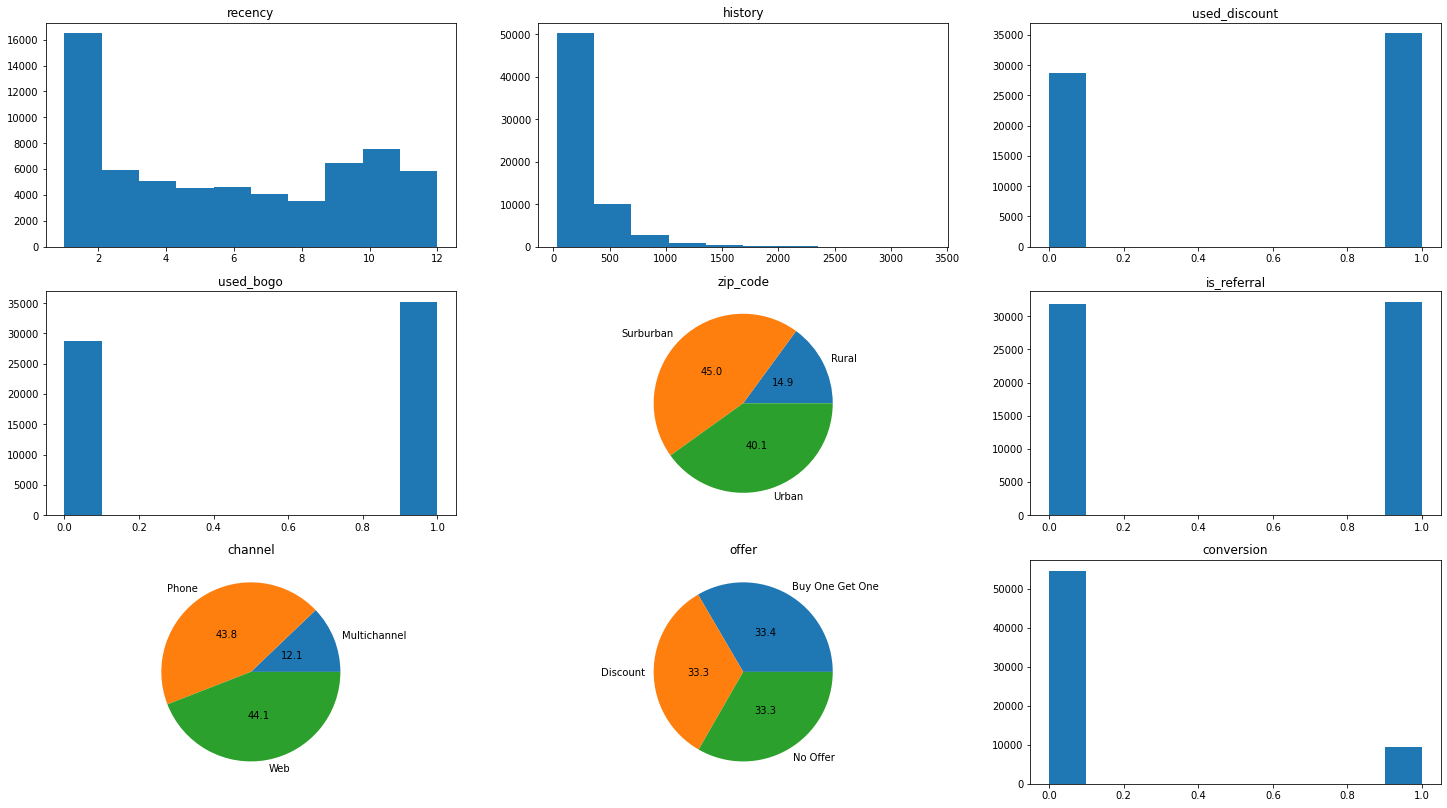

In [ ]:


fig, axes = plt.subplots(3,3, figsize=(25,14))
i = 0

for ind, col in enumerate(data.columns):
  if (ind%3 == 0) and (ind>0):
    i+=1
  if col in ['zip_code', 'channel', 'offer']:
    out = data.groupby(data[col]).agg({col:['count']});
    axes[i,ind%3].pie(x=out, autopct='%.1f', labels=out.index, pctdistance=0.5);
  else:
    axes[i,ind%3].hist(data[col]);
  axes[i,ind%3].set_title(col);
  



  

##One hot encode variables

In [ ]:
data_onehot = pd.get_dummies(data)
data_onehot.head()

recency  history  used_discount  used_bogo  is_referral  conversion  \
0       10   142.44              1          0            0           0   
1        6   329.08              1          1            1           0   
2        7   180.65              0          1            1           0   
3        9   675.83              1          0            1           0   
4        2    45.34              1          0            0           0   

   zip_code_Rural  zip_code_Surburban  zip_code_Urban  channel_Multichannel  \
0               0                   1               0                     0   
1               1                   0               0                     0   
2               0                   1               0                     0   
3               1                   0               0                     0   
4               0                   0               1                     0   

   channel_Phone  channel_Web  offer_Buy One Get One  offer_Discount  \
0              1            0                      1               0   
1              0            1                      0               0   
2              0            1                      1               0   
3              0            1                      0               1   
4              0            1                      1               0   

   offer_No Offer  
0               0  
1               1  
2               0  
3               0  
4               0

##Correlation Plot

In [ ]:
# print(['red' if wt == 'Urban' else 'green' if wt == 'Suburban' else 'blue' for wt in list(data['zip_code'])][0:10])

def categorize(zip_code):
  categorizer = {'Urban':'red',
                 'Surburban':'green',
                 'Rural':'blue'}
  return categorizer.get(zip_code)

def categorize_to_numeric(zip_code):
  categorizer = {'Urban':0,
                 'Surburban':1,
                 'Rural':2,
                 'Phone':0,
                 'Web':1,
                 'Multichannel':2}
  return categorizer.get(zip_code)



print([categorize_to_numeric(i) for i in data['zip_code'][0:10]])

[1, 2, 1, 2, 0, 1, 1, 0, 2, 0]


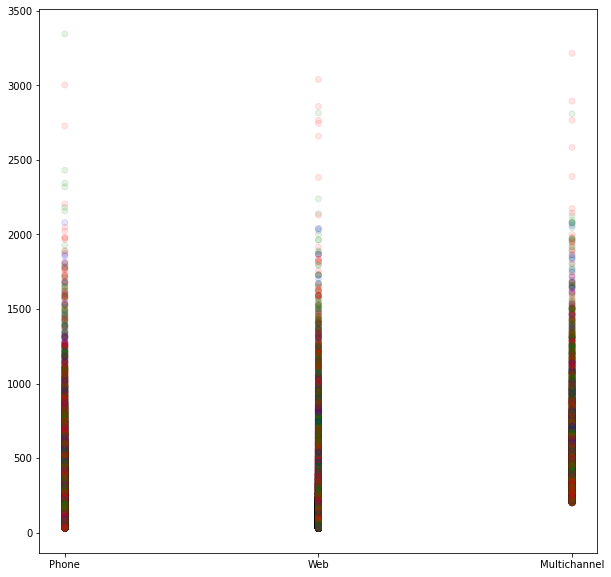

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['channel'], data['history'], c=[categorize(i) for i in data['zip_code']], alpha=0.1);

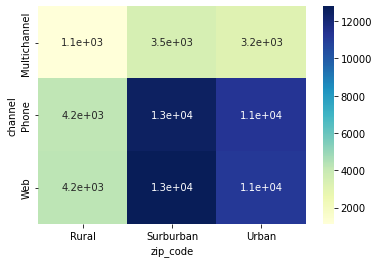

In [ ]:
out = pd.crosstab(data['channel'], data['zip_code'])
sns.heatmap(out, cmap='YlGnBu', annot=True);

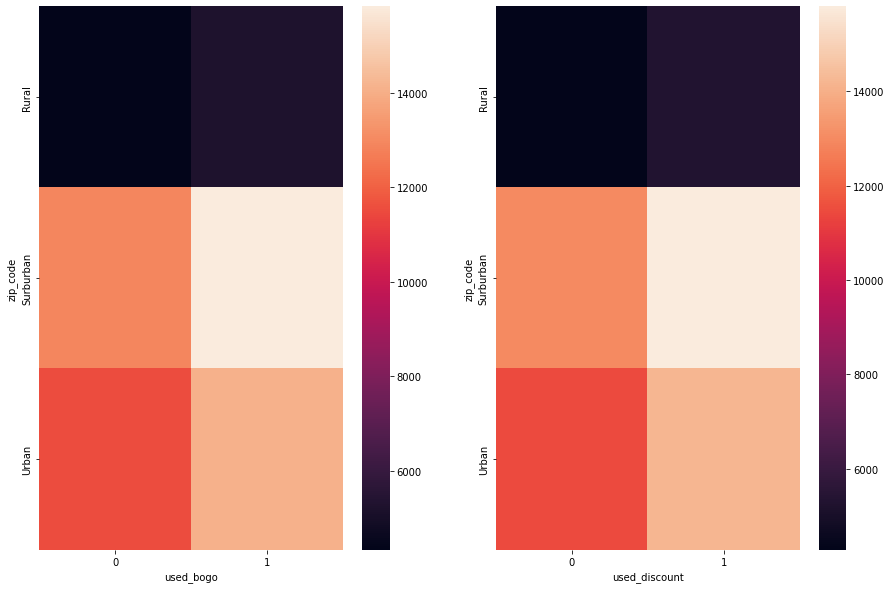

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
out = pd.crosstab(data['zip_code'], data['used_bogo'])
sns.heatmap(ax=axes[0], data=out);

out = pd.crosstab(data['zip_code'], data['used_discount'])
sns.heatmap(ax=axes[1], data=out);

In [ ]:
temp = data['history'][np.logical_and(data['history']>=500.0, data['history']<1000.0)].value_counts()
len(temp)
# data['history'].mean()

6206

(array([5.0173e+04, 9.9390e+03, 2.6780e+03, 8.0900e+02, 2.7700e+02,
        8.3000e+01, 2.4000e+01, 5.0000e+00, 9.0000e+00, 3.0000e+00]),
 array([  29.99 ,  361.584,  693.178, 1024.772, 1356.366, 1687.96 ,
        2019.554, 2351.148, 2682.742, 3014.336, 3345.93 ]),
 <a list of 10 Patch objects>)

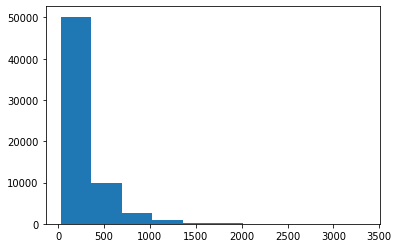

In [ ]:
plt.hist(data['history'], bins=10)

In [ ]:
# thresholds:
# small spenders: 0->500
# medium spenders: 500 -> 1000
# big spenders: 1000+ 

low_mean = data['history'][np.logical_and(data['history']>=0.0, data['history']<500.0)].mean()
medium_mean = data['history'][np.logical_and(data['history']>=500, data['history']<1000.0)].mean()
high_mean = data['history'][data['history']>=1000].mean()

spending = deepcopy(data['history'])
spending[np.logical_and(spending>=0.0, spending<500.0)] = low_mean
spending[np.logical_and(spending>=500.0, spending<1000.0)] = medium_mean
spending[spending>=1000.0] = high_mean

spending.value_counts().head()
# data.head()

165.077752     55922
673.047007      6770
1303.880482     1308
Name: history, dtype: int64

In [ ]:
mult = 4563+2650+549
phone = 25598 + 2053 + 370
web = 25761+2067+389
print('mult: ' + str(mult),'phone: ' + str(phone), 'web: ' + str(web), 'total: ' + str(mult+phone+web))

mult: 7762 phone: 28021 web: 28217 total: 64000


In [ ]:
pd.crosstab(spending, data['channel'])

channel      Multichannel  Phone    Web
history                                
165.077752           4563  25598  25761
673.047007           2650   2053   2067
1303.880482           549    370    389

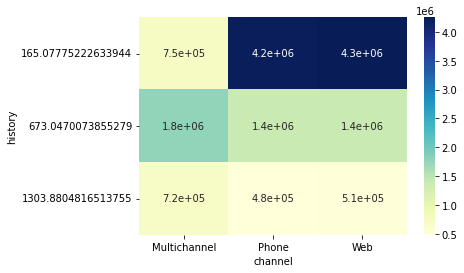

In [ ]:
out = pd.crosstab(spending, data['channel'])
out.iloc[0:1]=out.iloc[0:1]*165.078
out.iloc[1:2]=out.iloc[1:2]*673.047
out.iloc[2:3]=out.iloc[2:3]*1303.88
sns.heatmap(out, cmap='YlGnBu', annot=True);

In [ ]:
conversions_ct = pd.crosstab(data['channel'], data['conversion'])
conversions_ct

conversion        0     1
channel                  
Multichannel   6429  1333
Phone         24458  3563
Web           23719  4498

In [ ]:
1333/6429
3563/24458

0.14567830566685747

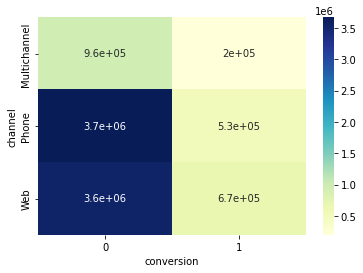

In [ ]:

sns.heatmap(conversions_ct, cmap='YlGnBu', annot=True);

##Implement K-Prototypes Clustering

In [ ]:
!pip install --upgrade kmodes
!pip install umap-learn
!pip install babyplots

In [ ]:
!pip uninstall umap
!pip install --upgrade umap-learn

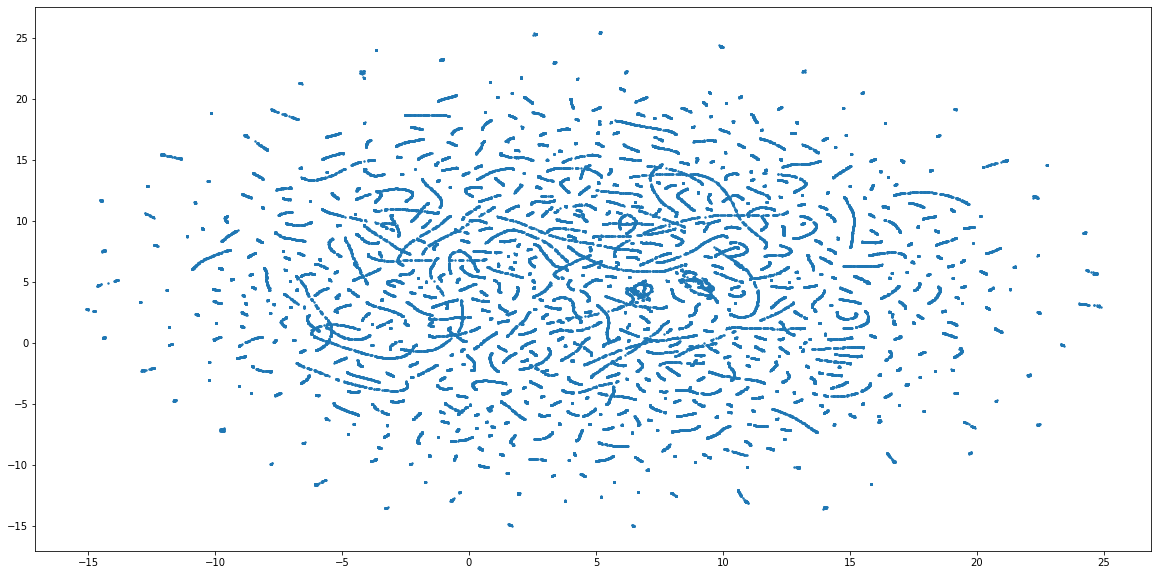

In [ ]:

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer
import umap.umap_ as umap

#Preprocessing numerical
numerical = data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(data.select_dtypes(include='object').columns) / data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)



#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, densmap_kwds = {},
                                                output_dens = False)


plt.figure(figsize=(20, 10))
plt.scatter(*embedding[0].T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [ ]:
# from babyplots import Babyplot




fit1_3d = umap.UMAP(metric='l2', n_components=3).fit(numerical)
fit2_3d = umap.UMAP(metric='dice', n_components=3).fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1_3d.graph_, fit2_3d.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding3d = umap.simplicial_set_embedding(fit1_3d._raw_data, intersection, fit1_3d.n_components, 
                                                fit1_3d._initial_alpha, fit1_3d._a, fit1_3d._b, 
                                                fit1_3d.repulsion_strength, fit1_3d.negative_sample_rate, 
                                                200, 'random', np.random, fit1_3d.metric, 
                                                fit1_3d._metric_kwds, False, densmap_kwds = {},
                                                output_dens = False)


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(*embedding3d[0].T, s=2, cmap='Spectral', alpha=1.0)



##Test out decision tree classifier

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix


X = pd.get_dummies(data.iloc[:,:-1])
Y = data.iloc[:,-1]

bacc_list = []

low_mean = data['history'][np.logical_and(data['history']>=0.0, data['history']<500.0)].mean()
medium_mean = data['history'][np.logical_and(data['history']>=500, data['history']<1000.0)].mean()
high_mean = data['history'][data['history']>=1000].mean()

X['history'][np.logical_and(data['history']>=0.0, data['history']<500.0)] = low_mean
X['history'][np.logical_and(data['history']>=500, data['history']<1000.0)] = medium_mean
X['history'][data['history']>=1000] = high_mean

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size = 0.3)


# try to grid search for best params

max_depth = np.arange(1,10,2)
min_samples_split = np.arange(2,20,3)

for i in max_depth:
  for j in min_samples_split:
    for c in ["gini", "entropy"]:
      for f in ["sqrt", None]:
        clf = tree.DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_split=j, criterion=c, max_features=f)
        clf = clf.fit(x_train, y_train);
        # plt.figure(figsize=(20,12))
        # tree.plot_tree(clf, fontsize=8);

        y_pred = clf.predict(x_test)
        bacc = balanced_accuracy_score(y_test, y_pred)
        print("bacc: " + str(bacc))
        bacc_list.append([bacc,(i,j,c,f),clf])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5
bacc: 0.5003554311912561
bacc: 0.5
bacc: 0.49996615877946526
bacc: 0.5
bacc: 0.5003554311912561
bacc: 0.5
bacc: 0.49996615877946526
bacc: 0.5
bacc: 0.5003554311912561
bacc: 0.5
bacc: 0.49996615877946526
bacc: 0.5
bacc: 0.5003554311912561
bacc: 0.5
bacc: 0.49996615877946

bacc: 0.5027080190641499


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


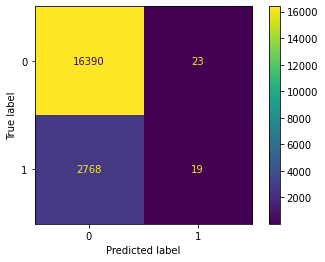

In [ ]:
# get best tree
clf = max(bacc_list,key=lambda item:item[0])[2]

y_pred = clf.predict(x_test)
bacc = balanced_accuracy_score(y_test, y_pred)
print("bacc: " + str(bacc))

plot_confusion_matrix(clf, x_test, y_test)

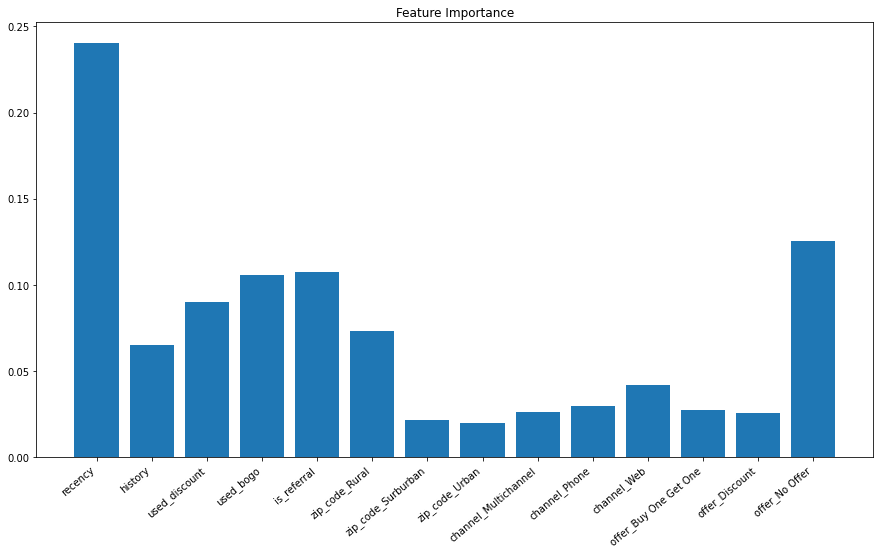

In [ ]:
importance = clf.feature_importances_
plt.figure(figsize=(15,8))
plt.bar([x for x in clf.feature_names_in_], importance)
plt.xticks(rotation=40, ha='right')
plt.title("Feature Importance")
plt.show()

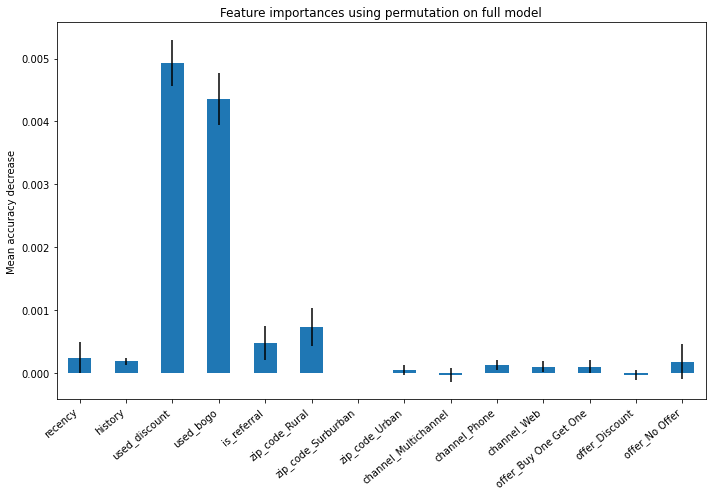

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=clf.feature_names_in_)
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(10,7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=40, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
import graphviz 

plt.figure(figsize=(20,12))
dot_data = tree.export_graphviz(clf,None,
                      feature_names=x_train.columns[:],  
                      class_names=['0','1'],  
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)  
graph


<Figure size 1440x864 with 0 Axes>

In [ ]:
!pwd

/gdrive
